In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module5_exercise_train.csv')
download_file(test_data_url, 'module5_exercise_test.csv')

Downloaded module5_exercise_train.csv from https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_train.csv
Downloaded module5_exercise_test.csv from https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_test.csv


In [3]:
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")
df_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

### Data analysis

In [4]:
#### Make a complete analysis on data preprocessing
# Inconsistencies
# Duplicates (data.duplicated().sum())
# Missing values (data.isnull().sum())
# Categorical
# Outliers
# Feature Engineering
# Feature Selection and/or Dimensionality Reduction

In [5]:
df_train.shape

(1909, 16)

In [6]:
df_test.shape

(365, 15)

In [7]:
data = pd.concat([df_train, df_test], axis=0)

In [8]:
df_train

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,2019-12-28,Sunny,67.220123,18.33 km/h,High,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638,254.061886
1905,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,266.231273
1906,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,266.231273
1907,2019-12-30,Cloudy,65.877214,7.67 m/s,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN,296.431897


In [9]:
df_train.sample(20)

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
563,2016-07-02,Sunny,45.727048,2.45 m/s,High,27.096381,27.971840,26.965562,27.445189,26.609760,27.054960,NaN,26.815739,NaN,27.339682,193.254275
1645,2019-04-26,Cloudy,57.757277,4.41 m/s,Moderate,15.571957,15.529984,NaN,15.527873,16.023387,NaN,15.665103,16.263537,NaN,NaN,191.741689
1802,2019-09-21,Sunny,59.192563,4.14 m/s,Moderate,16.473361,16.718908,16.685817,NaN,16.569988,15.706400,NaN,16.339630,17.608103,16.524099,182.483419
1803,2019-09-22,Rainy,63.458367,2.72 m/s,High,14.118205,13.935509,14.037818,14.340069,13.920582,14.284696,13.642462,14.287869,13.131903,13.121224,212.049614
1711,2019-06-30,Sunny,49.722550,14.85 km/h,Very High,28.754956,NaN,28.871106,NaN,28.955513,29.356754,28.424554,29.161257,28.149602,29.079471,189.815248
292,2015-10-17,Rainy,67.134573,12.66 km/h,High,9.518960,8.771254,9.647323,8.845980,NaN,9.513629,9.505448,9.283993,10.040450,NaN,214.283113
1735,2019-07-23,Cloudy,55.831551,0.56 m/s,High,26.118481,NaN,26.728669,25.992581,25.983845,26.019814,26.396979,26.147768,25.517963,25.895179,212.523632
27,2015-02-03,Snowy,64.906535,1.00 m/s,Very Low,-5.060613,-5.572464,-4.963638,-5.230771,NaN,-4.279570,-5.032633,-5.462734,-5.045997,NaN,324.421783
221,2015-08-11,Sunny,47.277053,10.16 km/h,Moderate,NaN,27.614243,27.905464,27.693822,26.215252,27.604262,26.792431,27.848215,28.274840,NaN,187.210898
109,2015-04-24,Rainy,68.186946,17.33 km/h,Very High,10.757776,11.086617,NaN,10.395579,11.043843,NaN,11.570207,11.292974,10.938178,NaN,238.735666


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       1909 non-null   object 
 1   weather_condition          1885 non-null   object 
 2   humidity                   1813 non-null   float64
 3   wind_speed                 1819 non-null   object 
 4   oil_brent_price_indicator  1909 non-null   object 
 5   temperature_station1       1624 non-null   float64
 6   temperature_station2       1634 non-null   float64
 7   temperature_station3       1620 non-null   float64
 8   temperature_station4       1632 non-null   float64
 9   temperature_station5       1630 non-null   float64
 10  temperature_station6       1636 non-null   float64
 11  temperature_station7       1601 non-null   float64
 12  temperature_station8       1627 non-null   float64
 13  temperature_station9       1621 non-null   float

In [11]:
df_train.describe()

,humidity,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
count,1813.000000,1624.000000,1634.000000,1620.000000,1632.000000,1630.000000,1636.000000,1601.000000,1627.000000,1621.000000,1593.000000,1909.000000
mean,115.958999,13.440861,13.084784,13.168254,13.308546,13.309407,13.296511,13.317062,13.334165,13.447605,13.296870,106.378555
std,1658.230311,10.778487,10.757797,10.824175,10.810548,10.743872,10.829775,10.764708,10.755966,10.773331,10.796397,5115.886615
min,32.814149,-12.819683,-12.316331,-12.904753,-12.783663,-9.513493,-12.873628,-12.752546,-13.213493,-13.369174,-12.360144,-223288.771683
25%,54.163000,5.610279,5.150641,5.169849,5.312132,5.474812,5.344790,5.521371,5.452395,5.532173,5.329772,185.065853
50%,62.021200,12.840557,12.608163,12.674240,12.840236,12.756529,12.729503,12.704331,12.925755,12.804044,12.745044,214.482125
75%,68.016016,22.769930,21.576833,22.095410,22.296514,22.153439,22.284599,22.260365,21.949013,22.622281,22.195277,257.229149
max,50000.000000,35.456648,37.267279,37.727810,38.133324,38.471490,38.588948,37.769152,38.098873,38.470479,37.651955,387.741952


#### Identifying inconsistencies in data types or values

In [12]:
import re

print("Inconsistencies in weather_condition:")
print(df_train["weather_condition"].nunique())
print("Inconsistencies in oil_brent_price_indicator:")
print(df_train["oil_brent_price_indicator"].nunique())
print("Inconsistencies in date:")
print(df_train['date'].apply(lambda x: not re.match(r'\d{4}-\d{2}-\d{2}', x)).sum())

Inconsistencies in weather_condition:
4
Inconsistencies in oil_brent_price_indicator:
5
Inconsistencies in date:
0


No formatting inconsistencies in "weather_conditon", "oil_brent_price_indicator" or "date".

In [13]:
df_train['wind_speed'].apply(type).value_counts()

wind_speed
<class 'str'>      1819
<class 'float'>      90
Name: count, dtype: int64

No mixed data types within a column except in the "wind_speed" column.

In [14]:
df_train[df_train['wind_speed'].apply(type) == float]

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
14,2015-01-21,Snowy,69.124236,NaN,Very Low,-7.022809,-5.748753,-6.790255,-6.370345,-7.510294,-6.607260,-7.580778,-6.863959,NaN,-6.223665,303.019437
16,2015-01-23,Snowy,61.122616,NaN,High,-4.166763,-4.788067,NaN,-3.953095,-4.089131,-5.229595,-4.524754,-4.501473,NaN,NaN,357.519718
35,2015-02-11,Cloudy,64.211620,NaN,Low,0.383906,-1.312244,0.898632,0.140126,0.520272,NaN,0.983895,-0.068810,0.711870,0.103597,269.789743
46,2015-02-22,Sunny,57.331224,NaN,Moderate,-6.391050,-5.091116,-6.647755,-6.585044,-6.706258,NaN,-6.236636,-5.787613,NaN,-6.196583,287.978006
95,2015-04-10,Rainy,64.742857,NaN,Moderate,15.863497,16.203570,16.454783,15.440076,14.444398,15.717709,15.811400,15.582605,NaN,15.949213,196.671590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,2019-09-04,Sunny,56.929097,NaN,Moderate,NaN,17.278039,17.758010,16.673111,17.628246,NaN,17.022402,17.385042,17.013770,17.733314,166.257330
1809,2019-09-28,Rainy,73.291850,NaN,Very High,10.289911,10.173100,10.259729,11.131176,9.627454,NaN,9.993418,10.466991,10.565587,10.518102,223.789734
1810,2019-09-29,Rainy,76.640238,NaN,Very High,11.762993,11.622418,11.768783,11.689437,11.973268,11.929004,12.826931,12.332807,NaN,11.639181,216.419559
1846,2019-11-03,Rainy,68.304536,NaN,High,9.735451,10.295516,9.966776,9.579859,9.674634,10.268542,10.208294,9.698276,9.999351,NaN,236.666381


#### Identifying duplicates

In [15]:
print("Duplicates:")
duplicates = df_train[df_train.duplicated(keep=False)].sort_values(by=df_train.columns.tolist())
duplicates

Duplicates:


,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
5,2015-01-13,Cloudy,58.649834,28.75 km/h,High,-5.037719,-4.891658,-4.655657,-5.545906,NaN,-5.323173,-5.771092,NaN,-4.554718,-4.719306,303.623789
6,2015-01-13,Cloudy,58.649834,28.75 km/h,High,-5.037719,-4.891658,-4.655657,-5.545906,NaN,-5.323173,-5.771092,NaN,-4.554718,-4.719306,303.623789
51,2015-02-27,Snowy,61.321278,11.61 km/h,Moderate,-0.765329,-1.089098,-0.272114,-1.010996,-1.117890,-0.483191,-1.151202,-0.835624,NaN,NaN,315.651282
52,2015-02-27,Snowy,61.321278,11.61 km/h,Moderate,-0.765329,-1.089098,-0.272114,-1.010996,-1.117890,-0.483191,-1.151202,-0.835624,NaN,NaN,315.651282
58,2015-03-05,Cloudy,54.187891,1.02 m/s,Very Low,11.442087,12.320326,10.781174,10.926194,11.684710,11.934129,11.126555,11.184591,12.166137,11.424691,227.826146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,2019-12-11,NaN,61.201308,27.61 km/h,Moderate,0.743648,1.006100,NaN,0.593362,0.851021,0.336086,0.934330,NaN,NaN,0.879479,301.559770
1892,2019-12-17,Snowy,65.362283,5.21 m/s,Moderate,-2.380559,-2.727055,-2.769237,NaN,-1.560074,-2.888126,NaN,NaN,-2.474213,-2.380799,290.157907
1893,2019-12-17,Snowy,65.362283,5.21 m/s,Moderate,-2.380559,-2.727055,-2.769237,NaN,-1.560074,-2.888126,NaN,NaN,-2.474213,-2.380799,290.157907
1905,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,266.231273


In [16]:
print(f"Number of duplicates: {duplicates.shape[0]}")

Number of duplicates: 180


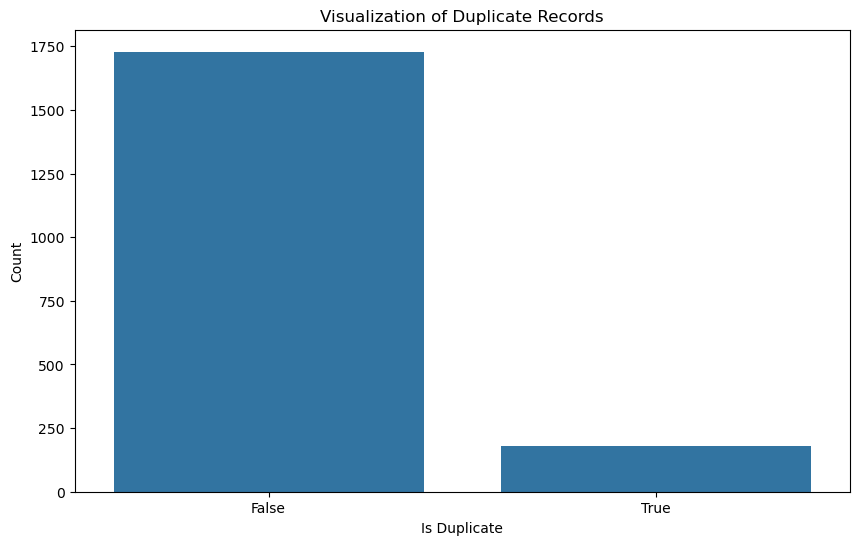

In [17]:
df_train['is_duplicate'] = df_train.duplicated(keep=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='is_duplicate', data=df_train)
plt.title('Visualization of Duplicate Records')
plt.xlabel('Is Duplicate')
plt.ylabel('Count')
plt.show()

In [18]:
df_train = df_train.drop(columns=['is_duplicate'], axis=1)

#### Identifying missing values

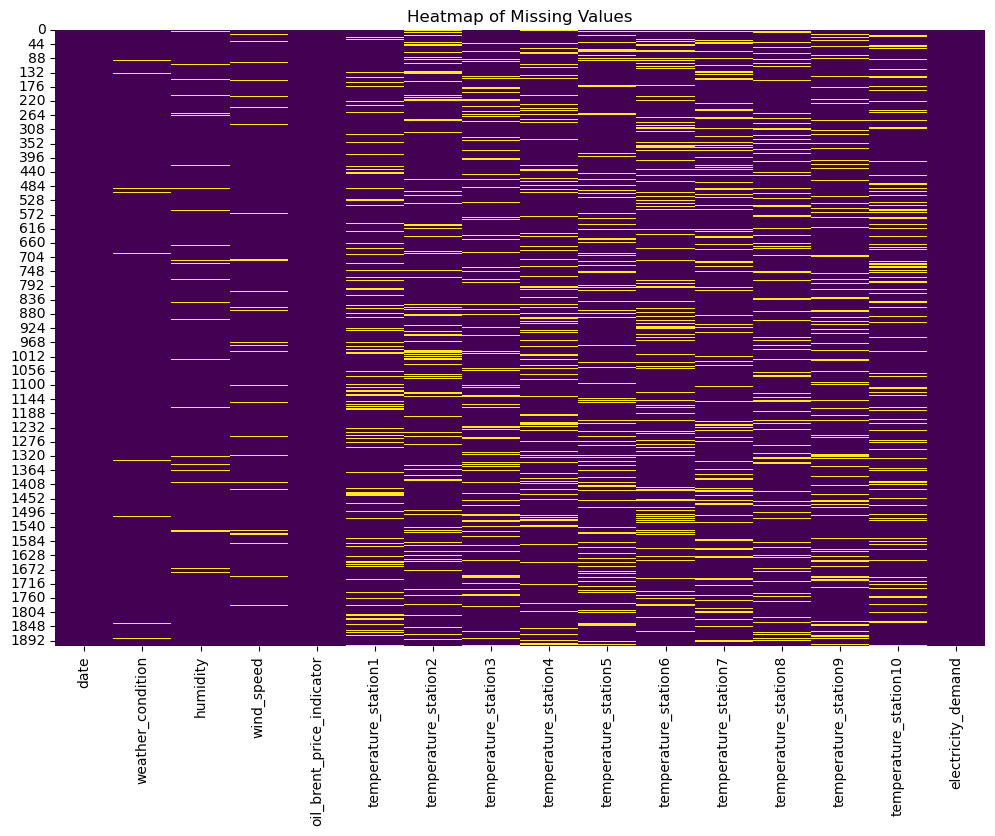

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [20]:
print("Percentage of missing values per column:")
print((df_train.isnull().sum() / len(df_train) * 100).round(2))

Percentage of missing values per column:
date                          0.00
weather_condition             1.26
humidity                      5.03
wind_speed                    4.71
oil_brent_price_indicator     0.00
temperature_station1         14.93
temperature_station2         14.41
temperature_station3         15.14
temperature_station4         14.51
temperature_station5         14.61
temperature_station6         14.30
temperature_station7         16.13
temperature_station8         14.77
temperature_station9         15.09
temperature_station10        16.55
electricity_demand            0.00
dtype: float64


In [21]:
#### Identifying outliers

In [22]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return data[z_scores > threshold]

outliers = detect_outliers_zscore(df_train['electricity_demand'])
print(outliers)
print()

for i in range(1,11):
    outliers = detect_outliers_zscore(df_train[f'temperature_station{i}'])
    print(outliers)

1029   -223288.771683
Name: electricity_demand, dtype: float64

Series([], Name: temperature_station1, dtype: float64)
Series([], Name: temperature_station2, dtype: float64)
Series([], Name: temperature_station3, dtype: float64)
Series([], Name: temperature_station4, dtype: float64)
Series([], Name: temperature_station5, dtype: float64)
Series([], Name: temperature_station6, dtype: float64)
Series([], Name: temperature_station7, dtype: float64)
Series([], Name: temperature_station8, dtype: float64)
Series([], Name: temperature_station9, dtype: float64)
Series([], Name: temperature_station10, dtype: float64)


In [23]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outliers = detect_outliers_iqr(df_train['humidity'])
print(outliers)

181        32.814149
1022    50000.000000
1509    50000.000000
Name: humidity, dtype: float64


In [24]:
df_train[df_train['humidity'] == 50000.000000]

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
1022,2017-09-13,Sunny,50000.0,2.36 m/s,Moderate,10.099884,10.032461,9.922033,NaN,9.979347,10.751949,NaN,9.304380,NaN,9.392699,219.769584
1509,2018-12-18,Rainy,50000.0,4.58 m/s,High,1.918337,1.237492,1.336341,2.182056,1.744867,2.059762,1.446822,1.865186,NaN,1.494266,293.376517


In [25]:
def plot_feature_over_time(df, feature, date_id_start, date_id_end):
    df_filtered = df[(df['date'] >= date_id_start) & (df['date'] <= date_id_end)]
    
    if feature not in df_filtered.columns:
        print(f"Feature '{feature}' not found in the DataFrame.")
        return
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['date'], df_filtered[feature], label=feature, linestyle='-')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.title(f'{feature} from {date_id_start} to {date_id_end}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [26]:
data['date'] = pd.to_datetime(data['date'])

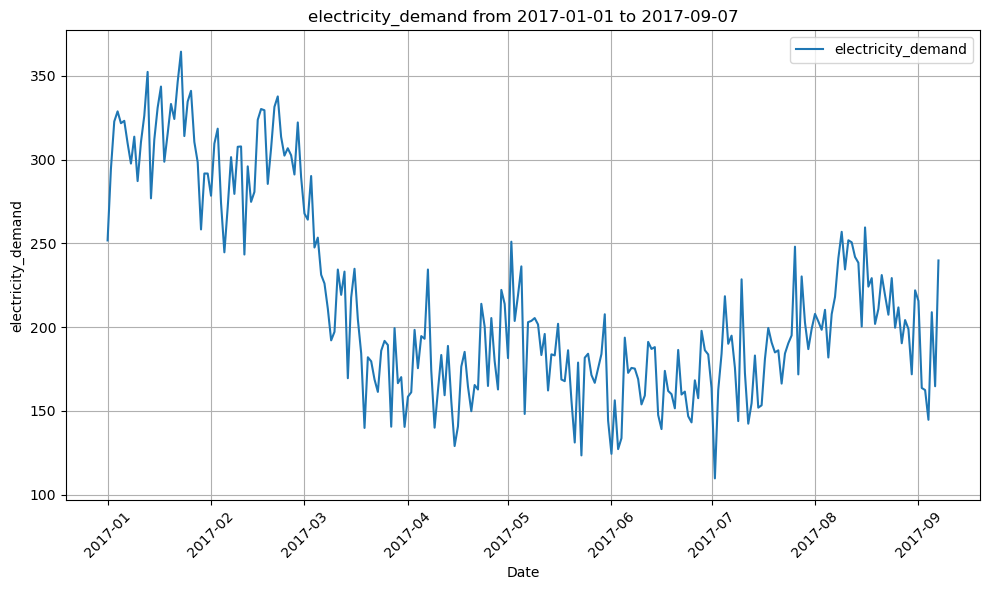

In [27]:
plot_feature_over_time(data, 'electricity_demand', '2017-01-01', '2017-09-07')

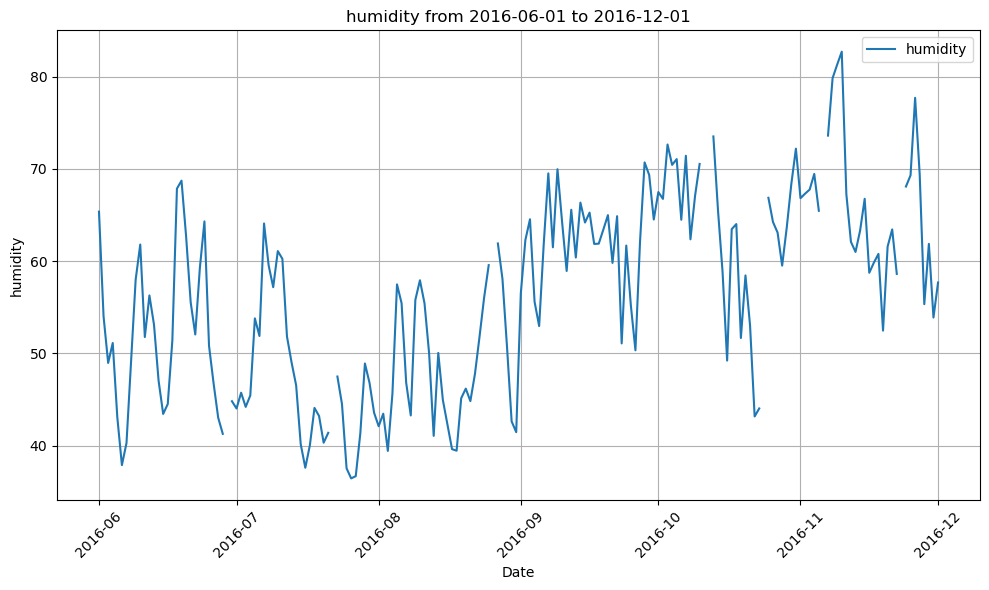

In [28]:
plot_feature_over_time(data, 'humidity', '2016-06-01', '2016-12-01')

### Data Preprocessing Evaluation Strategy

#### Handle inconsistencies
Formatting inconsistencies in the "wind_speed" column.

In [29]:
def convert_speed(speed):
    if isinstance(speed, str):
        value, unit = speed.split()
        value = float(value)
        if unit.lower() == "km/h":
            return value / 3.6
        elif unit.lower() == "m/s":
            return value
        else:
            return 0.0

In [30]:
df_train['wind_speed'] = df_train['wind_speed'].apply(lambda x: convert_speed(x))

In [31]:
df_train.sample(10)

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
484,2016-04-20,Sunny,52.260884,NaN,High,21.173249,22.126548,20.469114,21.327210,NaN,21.168476,21.001536,NaN,20.236632,21.354066,204.251651
1287,2018-05-24,Sunny,53.164823,4.972222,Low,18.537123,18.187018,18.057525,18.104510,NaN,18.113957,18.408804,NaN,18.531858,19.190937,121.439880
1242,2018-04-09,Sunny,54.085096,2.797222,Very High,14.406594,14.338658,14.927621,14.381831,14.093442,14.149046,14.178553,13.260787,NaN,13.901763,164.239914
1513,2018-12-22,Rainy,73.037712,NaN,High,0.504763,1.198353,NaN,1.273563,0.193088,1.246851,0.406731,NaN,NaN,NaN,263.918956
752,2016-12-31,Snowy,66.207161,7.216667,Moderate,-1.054395,-1.602008,-1.589214,-1.755498,-1.016143,-0.485443,-0.945778,NaN,-1.152282,-0.247081,288.517470
604,2016-08-10,Cloudy,57.921607,1.010000,High,30.274730,30.003891,31.030484,30.267671,30.375062,30.166546,30.242564,30.329529,30.612553,29.806715,221.808964
1334,2018-07-08,NaN,39.246286,2.133333,Moderate,33.859139,34.008307,33.978388,33.969203,33.317781,34.453122,32.845908,33.645888,33.707388,34.007675,175.137116
1423,2018-09-28,Cloudy,63.945098,5.050000,Moderate,3.900456,3.100700,NaN,3.153228,4.014510,3.967410,4.744859,4.056881,3.940663,3.996974,242.804866
1612,2019-03-27,Cloudy,68.476062,6.275000,Moderate,15.431529,15.530967,14.936656,NaN,15.587806,15.238184,15.671889,15.376304,16.103492,14.971449,168.612450
1124,2017-12-16,Snowy,69.067217,3.166667,Moderate,0.111975,0.329016,0.446926,0.266084,-0.096932,-0.338265,0.094510,-0.014618,0.022843,0.359472,259.893999


#### Handle duplicates

In [32]:
df_no_dupes = df_train.drop_duplicates()

In [33]:
# df_no_dupes[df_no_dupes.duplicated(keep=False)].sort_values(by=df_train.columns.tolist())

#### Handle missing values

In [34]:
df_ffill = df_no_dupes.ffill()

In [35]:
df_ffill.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1819 entries, 0 to 1908
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       1819 non-null   object 
 1   weather_condition          1819 non-null   object 
 2   humidity                   1819 non-null   float64
 3   wind_speed                 1819 non-null   float64
 4   oil_brent_price_indicator  1819 non-null   object 
 5   temperature_station1       1819 non-null   float64
 6   temperature_station2       1817 non-null   float64
 7   temperature_station3       1819 non-null   float64
 8   temperature_station4       1819 non-null   float64
 9   temperature_station5       1819 non-null   float64
 10  temperature_station6       1819 non-null   float64
 11  temperature_station7       1819 non-null   float64
 12  temperature_station8       1819 non-null   float64
 13  temperature_station9       1819 non-null   float64
 1

#### Handle categorical values

In [36]:
df_encoded = pd.get_dummies(df_ffill, columns=['weather_condition'])

In [37]:
le = LabelEncoder()
df_encoded['oil_brent_price_indicator_encoded'] = le.fit_transform(df_encoded['oil_brent_price_indicator'])

print("Encoding mappings:")
print("oil_brent_price_indicator:", dict(zip(le.classes_, le.transform(le.classes_))))              

Encoding mappings:
oil_brent_price_indicator: {'High': 0, 'Low': 1, 'Moderate': 2, 'Very High': 3, 'Very Low': 4}


In [38]:
df_encoded.sample(10)

,date,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand,weather_condition_Cloudy,weather_condition_Rainy,weather_condition_Snowy,weather_condition_Sunny,oil_brent_price_indicator_encoded
959,2017-07-14,39.761217,4.402778,Very High,20.853879,20.461222,20.126803,20.891182,21.610497,19.805002,20.723955,21.359303,21.278859,20.711748,183.077851,False,False,False,True,3
1117,2017-12-10,74.685174,2.670000,Moderate,-6.866796,-3.016574,-2.920743,-2.357084,-2.275880,-2.950057,-2.755221,-2.276806,-2.852651,-3.193915,327.046884,False,True,False,False,2
1540,2019-01-15,64.526934,2.844444,Moderate,-2.371180,-2.302567,-3.099438,-2.572713,-2.090369,-2.462904,-2.031212,-2.432594,-2.098250,-4.792498,332.689550,False,True,False,False,2
880,2017-04-30,60.601407,4.413889,Very Low,7.883220,5.684534,6.414488,7.807397,7.884989,6.550963,7.789868,7.046682,7.205284,7.264907,213.825780,True,False,False,False,4
1480,2018-11-20,67.408462,3.190000,Low,10.264019,9.451498,10.367529,10.671603,9.840504,9.984037,10.918006,9.977175,9.700752,10.662320,211.554705,False,True,False,False,1
740,2016-12-19,73.527344,4.269444,High,0.562843,-0.263066,0.336899,0.975809,0.925884,0.245715,-1.414440,0.426049,0.516598,0.493229,330.326775,False,True,False,False,0
1774,2019-08-26,52.468887,6.790000,High,35.386796,34.660710,35.628206,35.608248,35.237063,35.125033,34.639614,35.475503,35.218487,35.842005,246.423019,True,False,False,False,0
921,2017-06-07,68.314370,2.030556,High,20.594240,21.077578,20.348026,20.704339,20.365087,20.541297,20.885143,20.722440,20.011890,20.687507,175.672502,False,True,False,False,0
1437,2018-10-12,63.946971,4.340000,High,8.283505,8.592745,9.010177,8.085352,8.661076,7.660764,7.817492,8.157669,7.210975,9.902047,217.500818,False,False,False,True,0
352,2015-12-15,63.153607,4.570000,High,-4.081018,-3.992439,-3.662072,-4.054386,-4.482356,-3.936414,-4.206279,-3.413596,-4.047582,-4.147507,320.473871,False,False,True,False,0


In [39]:
df_encoded = df_encoded.drop(columns=['oil_brent_price_indicator'], axis=1)

#### Handle outliers

In [40]:
Q1 = df_encoded['humidity'].quantile(0.25)
Q3 = df_encoded['humidity'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df_encoded[(df_encoded['humidity'] <= Q3 + 1.5*IQR)]

In [41]:
z_scores = np.abs(stats.zscore(df_clean['electricity_demand']))
threshold = 3
df_clean = df_clean[z_scores <= threshold]

#### Feature Engineering

In [42]:
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['year'] = df_clean['date'].dt.year
df_clean['dayofweek'] = df_clean['date'].dt.dayofweek
df_clean['is_weekend'] = df_clean['dayofweek'].isin([5, 6]).astype(int)
df_clean['day_of_year'] = df_clean['date'].dt.dayofyear
df_clean['week_of_year'] = df_clean['date'].dt.isocalendar().week
df_clean['month_progress'] = df_clean['date'].dt.day / df_clean['date'].dt.days_in_month

In [43]:
df_clean = df_clean.drop(columns=['date'], axis=1)

In [44]:
# Normalize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_clean.columns)

# Inverse transform to get back to original scale
df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=df_clean.columns)

df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   humidity                           1816 non-null   float64
 1   wind_speed                         1816 non-null   float64
 2   temperature_station1               1816 non-null   float64
 3   temperature_station2               1816 non-null   float64
 4   temperature_station3               1816 non-null   float64
 5   temperature_station4               1816 non-null   float64
 6   temperature_station5               1816 non-null   float64
 7   temperature_station6               1816 non-null   float64
 8   temperature_station7               1816 non-null   float64
 9   temperature_station8               1816 non-null   float64
 10  temperature_station9               1816 non-null   float64
 11  temperature_station10              1816 non-null   float

In [45]:
y = df_imputed.pop('electricity_demand')
X = df_imputed.copy()

In [46]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reconvert to DataFrame with original column names and index
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [47]:
X_scaled

,humidity,wind_speed,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,...,weather_condition_Rainy,weather_condition_Snowy,weather_condition_Sunny,oil_brent_price_indicator_encoded,year,dayofweek,is_weekend,day_of_year,week_of_year,month_progress
0,0.666526,0.810164,0.273200,0.231605,0.258030,0.253391,0.188997,0.256250,0.254519,0.264711,...,0.0,0.0,0.0,0.50,0.0,0.500000,0.0,0.019178,0.019231,0.233333
1,0.422706,0.636098,0.307181,0.288763,0.286811,0.253391,0.243275,0.299038,0.289381,0.295575,...,0.0,0.0,1.0,0.50,0.0,0.666667,0.0,0.021918,0.019231,0.266667
2,0.545921,0.718107,0.211618,0.199548,0.182075,0.204083,0.157899,0.192825,0.191556,0.204918,...,1.0,0.0,0.0,0.50,0.0,0.833333,1.0,0.024658,0.019231,0.300000
3,0.503423,0.608762,0.187045,0.168247,0.191324,0.164710,0.127921,0.179221,0.153351,0.194491,...,0.0,1.0,0.0,0.50,0.0,1.000000,1.0,0.027397,0.019231,0.333333
4,0.503423,0.734229,0.215720,0.204810,0.197975,0.200257,0.127921,0.179221,0.153351,0.194491,...,0.0,1.0,0.0,0.00,0.0,0.000000,0.0,0.030137,0.038462,0.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,0.707027,0.665304,0.230856,0.201223,0.218744,0.233758,0.186353,0.206790,0.213568,0.226275,...,0.0,1.0,0.0,0.50,1.0,0.666667,0.0,0.986301,0.980769,0.866667
1812,0.628455,0.535339,0.332024,0.298989,0.298234,0.233758,0.186353,0.313046,0.315390,0.317816,...,0.0,0.0,1.0,0.00,1.0,0.833333,1.0,0.989041,0.980769,0.900000
1813,0.644257,0.761215,0.341944,0.327443,0.298234,0.331036,0.289233,0.319727,0.319800,0.338845,...,1.0,0.0,0.0,0.50,1.0,1.000000,1.0,0.991781,0.980769,0.933333
1814,0.603926,0.806425,0.341944,0.262523,0.298234,0.243067,0.186154,0.241513,0.253095,0.257924,...,0.0,0.0,0.0,0.50,1.0,0.000000,0.0,0.994521,0.000000,0.966667


In [48]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=15)  # Select top 5 features
X_new = selector.fit_transform(X_scaled, y)

selected_features = selector.get_support(indices=True)
feature_names = X.columns[selected_features]
print("Selected features:", feature_names)

Selected features: Index(['temperature_station7', 'temperature_station8', 'temperature_station9',
       'temperature_station10', 'weather_condition_Cloudy',
       'weather_condition_Rainy', 'weather_condition_Snowy',
       'weather_condition_Sunny', 'oil_brent_price_indicator_encoded', 'year',
       'dayofweek', 'is_weekend', 'day_of_year', 'week_of_year',
       'month_progress'],
      dtype='object')


C:\Users\tomas\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [49]:
# Reconvert to DataFrame with original column names and index
X_new = pd.DataFrame(X_new, columns=feature_names, index=X.index)

In [50]:
X_new

,temperature_station7,temperature_station8,temperature_station9,temperature_station10,weather_condition_Cloudy,weather_condition_Rainy,weather_condition_Snowy,weather_condition_Sunny,oil_brent_price_indicator_encoded,year,dayofweek,is_weekend,day_of_year,week_of_year,month_progress
0,0.254519,0.264711,0.282576,0.239452,1.0,0.0,0.0,0.0,0.50,0.0,0.500000,0.0,0.019178,0.019231,0.233333
1,0.289381,0.295575,0.294126,0.278783,0.0,0.0,0.0,1.0,0.50,0.0,0.666667,0.0,0.021918,0.019231,0.266667
2,0.191556,0.204918,0.212469,0.191739,0.0,1.0,0.0,0.0,0.50,0.0,0.833333,1.0,0.024658,0.019231,0.300000
3,0.153351,0.194491,0.176337,0.191739,0.0,0.0,1.0,0.0,0.50,0.0,1.000000,1.0,0.027397,0.019231,0.333333
4,0.153351,0.194491,0.204067,0.206491,0.0,0.0,1.0,0.0,0.00,0.0,0.000000,0.0,0.030137,0.038462,0.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,0.213568,0.226275,0.233497,0.213048,0.0,0.0,1.0,0.0,0.50,1.0,0.666667,0.0,0.986301,0.980769,0.866667
1812,0.315390,0.317816,0.233497,0.316639,0.0,0.0,0.0,1.0,0.00,1.0,0.833333,1.0,0.989041,0.980769,0.900000
1813,0.319800,0.338845,0.330342,0.328530,0.0,1.0,0.0,0.0,0.50,1.0,1.000000,1.0,0.991781,0.980769,0.933333
1814,0.253095,0.257924,0.241215,0.328530,1.0,0.0,0.0,0.0,0.50,1.0,0.000000,0.0,0.994521,0.000000,0.966667


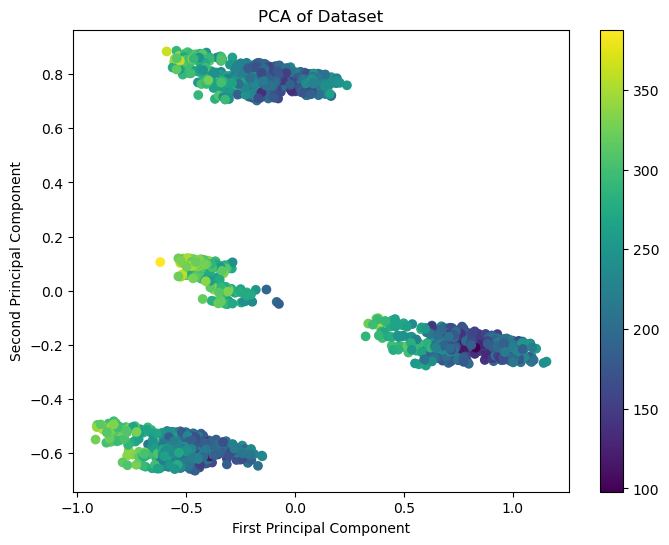

Explained variance ratio: [0.20551247 0.18075962]


In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_new)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset')
plt.colorbar()
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)

In [52]:
def evaluate_pipeline(X, y, n_splits=5):    
    model = LinearRegression()
    
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    train_scores = []
    val_scores = []
    
    for fold, (train_index, val_index) in enumerate(tscv.split(X)):
        print(f"Processing fold {fold + 1}/{n_splits}...")
        
        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index].copy(), X.iloc[val_index].copy()
        y_train, y_val = y.iloc[train_index].copy(), y.iloc[val_index].copy()

        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training set
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_scores.append(train_mse)
        
        # Predict on validation set
        y_val_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_scores.append(val_mse)
        
        print(f"Fold {fold + 1} Train MSE: {train_mse:.4f}, Validation MSE: {val_mse:.4f}")
    
    # Compute mean, max, and min values for train and validation MSE
    mean_train_mse = np.mean(train_scores)
    max_train_mse = np.max(train_scores)
    min_train_mse = np.min(train_scores)
    
    mean_val_mse = np.mean(val_scores)
    max_val_mse = np.max(val_scores)
    min_val_mse = np.min(val_scores)
    
    # Print results
    print("\nTrain MSE:")
    print(f"Mean: {mean_train_mse:.4f}, Max: {max_train_mse:.4f}, Min: {min_train_mse:.4f}")
    
    print("\nValidation MSE:")
    print(f"Mean: {mean_val_mse:.4f}, Max: {max_val_mse:.4f}, Min: {min_val_mse:.4f}")
    
    return mean_val_mse  # Return mean validation MSE as the overall score

In [53]:
# Run the evaluation
evaluate_pipeline(X_scaled, y)

Processing fold 1/5...
Fold 1 Train MSE: 705.3527, Validation MSE: 1300.5656
Processing fold 2/5...
Fold 2 Train MSE: 926.7985, Validation MSE: 1083.1301
Processing fold 3/5...
Fold 3 Train MSE: 913.3560, Validation MSE: 1348.5868
Processing fold 4/5...
Fold 4 Train MSE: 996.0750, Validation MSE: 1097.5818
Processing fold 5/5...
Fold 5 Train MSE: 1004.0292, Validation MSE: 1025.9613

Train MSE:
Mean: 909.1223, Max: 1004.0292, Min: 705.3527

Validation MSE:
Mean: 1171.1651, Max: 1348.5868, Min: 1025.9613


1171.1651121521725

### Generating Submission File

In [54]:
# Train and submit your results

In [55]:
X_test_og =  pd.read_csv("module5_exercise_test.csv", sep=",")

In [56]:
X_test1 = X_test_og.copy()

X_test1['wind_speed'] = X_test1['wind_speed'].apply(lambda x: convert_speed(x))

X_test2 = X_test1.ffill()

X_test3 = pd.get_dummies(X_test2, columns=['weather_condition'])

X_test3['oil_brent_price_indicator_encoded'] = le.fit_transform(X_test3['oil_brent_price_indicator'])
X_test4 = X_test3.drop(columns=['oil_brent_price_indicator'], axis=1)

X_test4['date'] = pd.to_datetime(X_test4['date'])
X_test4['year'] = X_test4['date'].dt.year
X_test4['dayofweek'] = X_test4['date'].dt.dayofweek
X_test4['is_weekend'] = X_test4['dayofweek'].isin([5, 6]).astype(int)
X_test4['day_of_year'] = X_test4['date'].dt.dayofyear
X_test4['week_of_year'] = X_test4['date'].dt.isocalendar().week
X_test4['month_progress'] = X_test4['date'].dt.day / X_test4['date'].dt.days_in_month
X_test4 = X_test4.drop(columns=['date'], axis=1)

X_test5 = pd.DataFrame(scaler.fit_transform(X_test4), columns=X_test4.columns)

X_test6 = pd.DataFrame(imputer.fit_transform(X_test5), columns=X_test5.columns)

X_test7 = pd.DataFrame(scaler.inverse_transform(X_test6), columns=X_test6.columns)

X_test8 = scaler.fit_transform(X_test7)

X_test8 = pd.DataFrame(X_test8, columns=X_test7.columns, index=X_test7.index)

In [57]:
model = LinearRegression()

model.fit(X_scaled, y)
y_test_pred = model.predict(X_test8)

In [58]:
# Generating Submission File
submission = pd.DataFrame({
    'date': X_test_og['date'],
    'electricity_demand': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False, sep=',')
print("Submission file saved as 'submission.csv'.")

Submission file saved as 'submission.csv'.
